# BGC Argo data workshop (example)

## Workshop overview
<li> Loading libraries
<li> Fetching Data
<li> Plotting data
<li> Saving plots

In [1]:
# Loading libraries

import argopy as ar
import xarray as xr

In [3]:
ds = ar.DataFetcher(backend='erddap').float(3901586).to_xarray()

Here wwe used the erddap backend to fetch data from the Argo BGC dataset. The float file has been parsed into an xarray dataset.
We can visualize the dataset using the `display` function.

In [4]:
display(ds)

<xarray.Dataset> Size: 6MB
Dimensions:          (N_POINTS: 65934)
Coordinates:
    LATITUDE         (N_POINTS) float64 527kB 60.91 60.91 60.91 ... 60.81 60.81
    LONGITUDE        (N_POINTS) float64 527kB -17.12 -17.12 ... -27.03 -27.03
    TIME             (N_POINTS) datetime64[ns] 527kB 2024-10-11T13:50:25 ... ...
  * N_POINTS         (N_POINTS) int32 264kB 0 1 2 3 ... 65930 65931 65932 65933
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int32 264kB 1 1 1 1 1 1 1 ... 93 93 93 93 93 93
    DATA_MODE        (N_POINTS) <U1 264kB 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 264kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int32 264kB 3901586 3901586 ... 3901586 3901586
    POSITION_QC      (N_POINTS) int32 264kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 264kB 3.52 4.46 ... 1.013e+03 1.015e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 264kB nan nan nan nan ... nan nan nan
    PSAL_QC          (N_POINTS) int32 264kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 264kB 11.33 11.33 11.33 ... 5.311 5.305
    TEMP_ERROR       (N_POINTS) float32 264kB nan nan nan nan ... nan nan nan
    TEMP_QC          (N_POINTS) int32 264kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int32 264kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           flapet
    Fetched_date:         2025/08/07
    Fetched_constraints:  WMO3901586
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

But this float file is supposed to have standard BGC argo variables, here we only have the physics variables.

In [6]:
ds_bgc = ar.DataFetcher(backend='erddap', ds = 'bgc').float(6901514).to_xarray()

In [7]:
display(ds_bgc)

<xarray.Dataset> Size: 4kB
Dimensions:                       (N_POINTS: 17)
Coordinates:
    LATITUDE                      (N_POINTS) float64 136B 62.64 62.64 ... 63.04
    LONGITUDE                     (N_POINTS) float64 136B -20.67 ... -23.38
    TIME                          (N_POINTS) datetime64[ns] 136B 2013-04-21T1...
  * N_POINTS                      (N_POINTS) int32 68B 0 1 2 3 4 ... 13 14 15 16
Data variables: (12/49)
    BBP700                        (N_POINTS) float32 68B 0.0005428 ... 0.002251
    BBP700_DATA_MODE              (N_POINTS) <U1 68B 'D' 'D' 'D' ... 'D' 'D' 'D'
    BBP700_ERROR                  (N_POINTS) float32 68B 0.0001086 ... 0.0004502
    BBP700_QC                     (N_POINTS) int32 68B 1 1 1 1 1 1 ... 1 1 1 1 1
    CHLA                          (N_POINTS) float32 68B 0.2519 ... 0.07746
    CHLA_DATA_MODE                (N_POINTS) <U1 68B 'A' 'A' 'A' ... 'A' 'A' 'A'
    ...                            ...
    PSAL_QC                       (N_POINTS) int32 68B 1 1 1 1 1 1 ... 1 1 1 1 1
    TEMP                          (N_POINTS) float32 68B 7.948 7.872 ... 7.818
    TEMP_DATA_MODE                (N_POINTS) <U1 68B 'D' 'D' 'D' ... 'D' 'D' 'D'
    TEMP_ERROR                    (N_POINTS) float32 68B 0.002 0.002 ... 0.002
    TEMP_QC                       (N_POINTS) int32 68B 1 1 1 1 1 1 ... 1 1 1 1 1
    TIME_QC                       (N_POINTS) int32 68B 1 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           flapet
    Fetched_date:         2025/08/07
    Fetched_constraints:  WMO6901514
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [BBP700,CHLA,DOWNWELLING_PAR,DOWN_IRRADIANCE380,DOW...

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

ValueError: not enough values to unpack (expected 2, got 1)

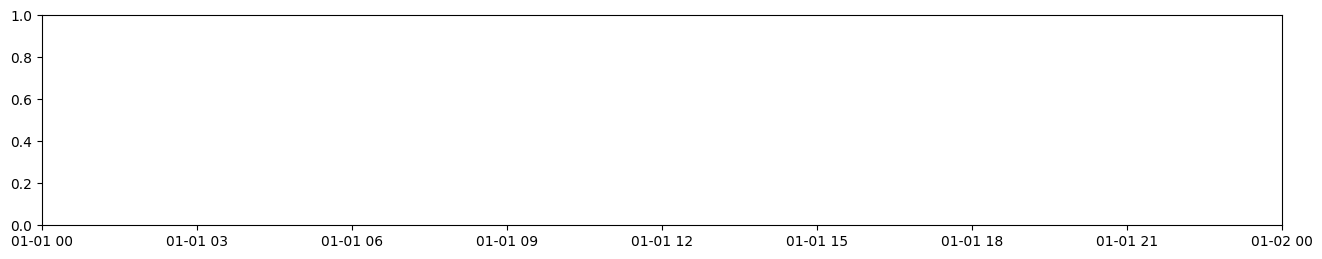

In [ ]:
# # Stack NumPy array of datetimes to create a 2D grid
# time_2D = np.tile(ds_bgc['TIME'].values,(len(ds_bgc['N_POINTS']),1)).T

# # Function for repetitive parts of plot
# def config_depth_section(cbar_label,title):
#   plt.ylim([0,250])
#   plt.gca().invert_yaxis()
#   plt.ylabel('Pressure (dbar)')
#   if 'Nitrate' in cbar_label: extend = 'min'
#   else:                       extend = 'neither'
#   plt.colorbar(label=cbar_label,extend=extend)
#   plt.title(title)

# # Create subplots
# plt.figure(figsize=(16,6))
# plt.subplot(2,1, 1)
# cmap = plt.get_cmap('viridis')
# cmap.set_under('0.5')
# plt.pcolor(time_2D,ds_bgc['PRES'].values,ds_bgc['CHLA'].values,cmap=cmap)
# config_depth_section('Nitrate (µmol/kg)',"Parameter: 'CHLA'")

# plt.subplot(2,2,2)
# plt.pcolor(time_2D,ds_bgc['PRES'].values,ds_bgc['CHLA_QC'].values.astype(float),cmap='Set1',vmin=0.5,vmax=9.5)
# config_depth_section('QC flag',"Parameter: 'CHLA_QC'")


# plt.tight_layout(h_pad=5,w_pad=3)